In [29]:
!pip install pandas==1.3.1

In [36]:
import pandas as pd
print(pd.__version__)

1.1.5


In [6]:
import os
import json
import string
import nltk
import pandas 
import re
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#read the txt file
data =  pandas.read_csv("osha.txt",delimiter="\t",header=None,names=["TD","Title","Text"])

In [9]:
#pre_preparation
stop = stopwords.words('english')+['employee', 'is','are']
WNlemma = nltk.WordNetLemmatizer()
com=re.compile('[0-9]*:[0-9]*')

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens=[com.sub('',t) for t in tokens ]
    tokens=[re.sub('[a,p].m','',t) for t in tokens]
    tokens=[ t for t in tokens if t not in stop]
    tokens=[t for t in tokens if not t.isnumeric()]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    return(tokens)

In [10]:
title=data['Title']
title_token=title.apply(pre_process)




In [26]:
text_token

0       [approximately, november, edco, waste, recycli...
1       [august, working, flatbed, trailer, worked, fe...
2       [august, templar, inc., construction, company,...
3       [august, lee, iron, metal, company, inc., usin...
4       [july, vacuum, truck, driver, operator, offloa...
                              ...                        
9995    [june, remotely, controlling, locomotive, pugh...
9996    [approximately, april, operating, steam, locom...
9997    [operating, remote, controlled, rail, engine, ...
9998    [september, riding, fireman, engineer, cab, st...
9999    [approximately, march, contract, worker, refin...
Name: Text, Length: 10000, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [12]:
tokens =set()
for item in title_token:
    for i in item:
        tokens.add(i)


In [ ]:
title=data['Title']
title_token=title.apply(pre_process)

title_tokenlist=[]
for id,tx in title.iteritems(): 
  ttokens = pre_process(tx)
  title_tokenlist.append(tokens)

title_tokens=[]
for item in title_tokenlist:
    for i in item:
        title_tokens.append(i)

In [13]:
import logging
import gensim
from gensim import corpora

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [18]:
# Filter off any words with document frequency less than 2, or appearing in more than 90% documents
dictionary = corpora.Dictionary(title_token)
print(dictionary)
dictionary.filter_extremes(no_below=2, no_above=0.8)

2022-01-07 04:56:31,753 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-01-07 04:56:31,868 : INFO : built Dictionary(3303 unique tokens: ['burned', 'fluid', 'forklift', 'radiator', 'fall']...) from 10000 documents (total 42554 corpus positions)
2022-01-07 04:56:31,878 : INFO : discarding 1447 tokens: [('wir', 1), ('penetrated', 1), ('beet', 1), ('avalance', 1), ('setter', 1), ('contusions/abrasions', 1), ('adbrasive', 1), ('sabar', 1), ('iburns', 1), ('fiber', 1)]...
2022-01-07 04:56:31,882 : INFO : keeping 1856 tokens which were in no less than 2 and no more than 8000 (=80.0%) documents
2022-01-07 04:56:31,889 : INFO : resulting dictionary: Dictionary(1856 unique tokens: ['burned', 'fluid', 'forklift', 'radiator', 'fall']...)


Dictionary(3303 unique tokens: ['burned', 'fluid', 'forklift', 'radiator', 'fall']...)


In [15]:
dtm = [dictionary.doc2bow(d) for d in title_token]
lda = gensim.models.ldamodel.LdaModel(dtm, num_topics = 5, id2word = dictionary, passes=10,chunksize=128,random_state=10)

#lda.show_topics(10)

Streaming output truncated to the last 5000 lines.
2022-01-07 04:51:40,855 : INFO : merging changes from 128 documents into a model of 10000 documents
2022-01-07 04:51:40,860 : INFO : topic #0 (0.200): 0.099*"burned" + 0.042*"amputates" + 0.039*"two" + 0.034*"shock" + 0.033*"electric" + 0.022*"exposed" + 0.021*"vapor" + 0.020*"gas" + 0.019*"flash" + 0.017*"line"
2022-01-07 04:51:40,862 : INFO : topic #1 (0.200): 0.096*"finger" + 0.052*"crushed" + 0.049*"amputated" + 0.046*"caught" + 0.046*"machine" + 0.042*"hand" + 0.034*"killed" + 0.032*"leg" + 0.032*"hot" + 0.024*"press"
2022-01-07 04:51:40,865 : INFO : topic #2 (0.200): 0.055*"killed" + 0.047*"injured" + 0.045*"burn" + 0.044*"truck" + 0.040*"explosion" + 0.035*"ladder" + 0.034*"suffers" + 0.032*"one" + 0.026*"sustains" + 0.026*"run"
2022-01-07 04:51:40,868 : INFO : topic #3 (0.200): 0.133*"struck" + 0.106*"killed" + 0.056*"injured" + 0.054*"falling" + 0.037*"fire" + 0.017*"three" + 0.015*"metal" + 0.014*"lift" + 0.014*"saw" + 0.013*

In [16]:
from gensim.models.coherencemodel import CoherenceModel
cm_umass = CoherenceModel(lda,  dictionary=dictionary, corpus=dtm, coherence='u_mass')
cm_cv = CoherenceModel(lda,  dictionary=dictionary, texts=tokens, coherence='c_v')
lda_umass = cm_umass.get_coherence()
lda_cv = cm_cv.get_coherence()
#print(lda_umass)
#print(lda_cv)


2022-01-07 04:53:42,642 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-01-07 04:53:42,650 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-01-07 04:53:42,657 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-01-07 04:53:42,665 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-01-07 04:53:42,674 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-01-07 04:53:42,681 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-01-07 04:53:42,686 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-01-07 04:53:42,696 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-01-07 04:53:42,702 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-01-07 04:53:42,711 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-01-07 04:53:42,727 : INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windo

In [17]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 46.0 MB/s 
     |████████████████████████████████| 15.7 MB 50.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=c6d31da5ebb2725048bd9aa4bf74f5aefcd75fbb9ae308d241780994684accc5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [20]:
#pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda, dtm, dictionary)
pyLDAvis.display(LDAvis_prepared)



/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Q1. What are the major types of accidents reflected in the reports?

-Are there labels available?  ——No

-Is the task supervised or unsupervised?  ——unsupervised

-Classification or clustering? Or topic modelling?  ——topic modelling

-Which column to use? Title or details?  ——Title

Q2. Which type of accidents has more occurrences?

——fall

In [28]:
text=data['Text']
text_token=text.apply(pre_process)

In [88]:
tokenlist=[]
for id,tx in text.iteritems():
  tokens = pre_process(tx)
  tokenlist.append(tokens)

In [89]:
text_tokens=[]
for item in tokenlist:
    for i in item:
        text_tokens.append(i)

In [94]:
from nltk import pos_tag
sent_pose=pos_tag(text_tokens)
sent_pose

[('approximately', 'RB'),
 ('november', 'JJ'),
 ('edco', 'JJ'),
 ('waste', 'NN'),
 ('recycling', 'VBG'),
 ('service', 'NN'),
 ('operating', 'VBG'),
 ('forklift', 'NN'),
 ('linde', 'JJ'),
 ('lift', 'JJ'),
 ('truck', 'NN'),
 ('serial', 'JJ'),
 ('number', 'NN'),
 ('h2x393s04578', 'NN'),
 ('identified', 'VBN'),
 ('employer', 'IN'),
 ('fl-3', 'JJ'),
 ('approximately', 'RB'),
 ('moving', 'VBG'),
 ('bale', 'NN'),
 ('recyclable', 'JJ'),
 ('paper', 'NN'),
 ('product', 'NN'),
 ('collection', 'NN'),
 ('area', 'NN'),
 ('yard', 'RB'),
 ('truck', 'NN'),
 ('cleaned', 'VBD'),
 ('replacing', 'VBG'),
 ('air', 'NN'),
 ('filter', 'JJ'),
 ('forklift', 'NN'),
 ('fl-3', 'JJ'),
 ('clean', 'JJ'),
 ('air', 'NN'),
 ('filter', 'NN'),
 ('parked', 'VBD'),
 ('fl-3', 'JJ'),
 ('doorway', 'JJ'),
 ('maintenance', 'NN'),
 ('building', 'NN'),
 ('air', 'NN'),
 ('filter', 'NN'),
 ('located', 'VBN'),
 ('rear', 'JJ'),
 ('forklift', 'NN'),
 ('behind', 'IN'),
 ('cab', 'NN'),
 ('frame', 'NN'),
 ('driver', 'JJ'),
 ('side', 'NN'),

In [77]:
wnl = nltk.WordNetLemmatizer()

In [95]:
# if we want to get the lemmas of the content words in the text
def lemmaNVAR(wpos):
    lemmas = []
    for w, pos in wpos:
        if pos[0] in ('N'):
            if pos in ('NNS'):
                lemmas.append(wnl.lemmatize(w.lower(), pos = pos[0].lower()))
            
    return lemmas

In [96]:
sent_pose=lemmaNVAR(sent_pose)


In [131]:
freq_n = FreqDist(sent_pose)
freq_n

FreqDist({'waste': 188,
          'service': 1217,
          'forklift': 766,
          'truck': 3135,
          'number': 1544,
          'h2x393s04578': 1,
          'bale': 76,
          'paper': 180,
          'product': 328,
          'collection': 67,
          'area': 2116,
          'air': 1068,
          'filter': 70,
          'maintenance': 556,
          'building': 876,
          'cab': 257,
          'frame': 388,
          'side': 1470,
          'foot': 1616,
          'system': 1014,
          'radiator': 21,
          'cap': 146,
          'fluid': 73,
          'pressure': 560,
          'morning': 177,
          'reservoir': 23,
          'leg': 767,
          'groin': 9,
          'ground': 1737,
          'coworkers': 905,
          'assistance': 109,
          'emergency': 1264,
          'burn': 1344,
          'center': 1468,
          'hour': 588,
          'degree': 339,
          'trailer': 791,
          'abdomen': 72,
          'inch': 445,
          'inju

(-0.5, 399.5, 199.5, -0.5)

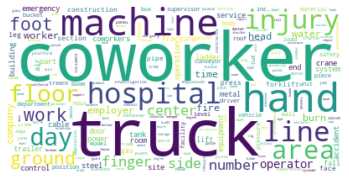

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(freq_n)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
#plt.show()

In [100]:
#.Get the list of body terms from wordnet
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
ss = wn.synsets('body_part')[0]
print(ss)
ss.hypernyms()

Synset('body_part.n.01')


[Synset('part.n.03')]

In [129]:
hps=ss.hyponyms()

In [135]:
hyps = list(set(
                [w for s in ss.closure(lambda s:s.hyponyms())
                        for w in s.lemma_names()]))


In [133]:
len(hyps)

3105

In [123]:
print(len(freq_n))

11193


In [134]:
body_count=list(filter(lambda x:x[0] in hyps,freq_n.items()))
sort_body=sorted(body_count,key=lambda x:x[1],reverse=True)
print(len(body_count))
print(len(sort_body))
print(sort_body)

318
318
[('hand', 2828), ('area', 2116), ('foot', 1616), ('finger', 1551), ('side', 1470), ('center', 1468), ('head', 1321), ('system', 1014), ('leg', 767), ('face', 733), ('body', 720), ('contractor', 475), ('valve', 465), ('plate', 423), ('process', 419), ('frame', 388), ('hole', 385), ('index', 379), ('blade', 356), ('eye', 338), ('tool', 336), ('dock', 327), ('bottom', 318), ('shaft', 309), ('structure', 288), ('shoulder', 280), ('neck', 279), ('pin', 272), ('bridge', 266), ('button', 228), ('member', 201), ('rib', 199), ('knee', 178), ('column', 173), ('pit', 172), ('bag', 169), ('bone', 166), ('tube', 166), ('vessel', 164), ('chest', 162), ('right', 159), ('grinder', 158), ('wrist', 153), ('opening', 143), ('hip', 138), ('heart', 138), ('thumb', 137), ('duct', 135), ('seat', 133), ('corporation', 129), ('ankle', 121), ('ball', 115), ('lung', 101), ('skin', 97), ('toe', 96), ('pad', 91), ('limb', 88), ('hood', 85), ('rear', 84), ('pelvis', 83), ('elbow', 83), ('brush', 81), ('nail

Q3. Which part of the human body is injured most? 

hand

-Information Extraction: extract the mentioning of injured body parts in the text, then count (in what way?)

—— body_count=list(filter(lambda x:x[0] in hyps,freq_n.items()))

-Which column to use?

—— text. Because parts of titles does not mention the injured part and text give us detailed Information

-How to identify “body part” words?  : still need case lowering, lemmatization, pos

—— Indentifying"body part"by hyponyms of "body_part"

-Any ambiguities? (e.g. is “hand” always referring to hand?)

——Yes, there are some ambiguities like hand means help sometimes.

In [143]:
pp = wn.synsets('job')[0]
print(ss)
ss.hypernyms()

Synset('body_part.n.01')


[Synset('part.n.03')]

In [144]:
hps_oc=pp.hyponyms()


In [145]:
hyp_oc = list(set(
                [w for s in pp.closure(lambda s:s.hyponyms())
                        for w in s.lemma_names()]))

In [146]:
oc_count=list(filter(lambda x:x[0] in hyp_oc,freq_n.items()))
sort_oc=sorted(oc_count,key=lambda x:x[1],reverse=True)
print(len(oc_count))
print(len(sort_oc))
print(sort_oc)

54
54
[('work', 1666), ('service', 1217), ('position', 658), ('place', 541), ('office', 376), ('post', 141), ('chair', 84), ('engineering', 76), ('instruction', 67), ('walk', 55), ('spot', 49), ('situation', 39), ('employment', 34), ('land', 32), ('technology', 30), ('masonry', 28), ('carpentry', 25), ('trade', 24), ('specialty', 24), ('medium', 20), ('talk', 18), ('roofing', 15), ('plumbing', 14), ('painting', 12), ('billet', 11), ('medicine', 10), ('game', 10), ('lighting', 10), ('sport', 10), ('law', 9), ('craft', 7), ('engagement', 6), ('education', 6), ('appointment', 4), ('berth', 4), ('catering', 3), ('regency', 3), ('woodwork', 3), ('spinning', 3), ('career', 2), ('literature', 2), ('plum', 2), ('accounting', 1), ('weaving', 1), ('workload', 1), ('automation', 1), ('navigation', 1), ('pottery', 1), ('ministry', 1), ('photography', 1), ('piecework', 1), ('upholstery', 1), ('netting', 1), ('confectionery', 1)]


Q4. What are the more risky occupations involved in such accidents?

worker

-How to identify “occupations” words?   
Through 